In this project we have tried all models that are in supervised machine learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
import warnings
warnings.filterwarnings("ignore")

### Data Loading and initial inspection

In [6]:
df = pd.read_csv("heart.csv")

In [8]:
df_original = df.copy()

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.shape

(1025, 14)

### Data preprocessing

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
## checking duplicated values

df.duplicated().sum()

723

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(302, 14)

In [20]:
## isolating categorical columns and numerical columns

cat_columns = []
num_columns = []

for col in df.columns:
    if df[col].nunique()<=10:
        cat_columns.append(col)
    else:
        num_columns.append(col)
print("Categorical columns: \n")       
print(cat_columns)
print()
print("Numerical columns: \n")       
print(num_columns)

Categorical columns: 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Numerical columns: 

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [21]:
for col in cat_columns:
    print()
    unique = df[col].unique()
    print(f"{col} : {unique}")


sex : [1 0]

cp : [0 1 2 3]

fbs : [0 1]

restecg : [1 0 2]

exang : [0 1]

slope : [2 0 1]

ca : [2 0 1 3 4]

thal : [3 2 1 0]

target : [0 1]


In [22]:
## now checking the distribution of the target variable

print("Percentage Distribution: ", df["target"].value_counts(normalize=True))

Percentage Distribution:  target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


### 3) Exploratory Data Analysis(EDA)

In [23]:
import os

if not os.path.exists('images'):
    os.makedirs("images")
    
## this folder is for save the outputs of plots

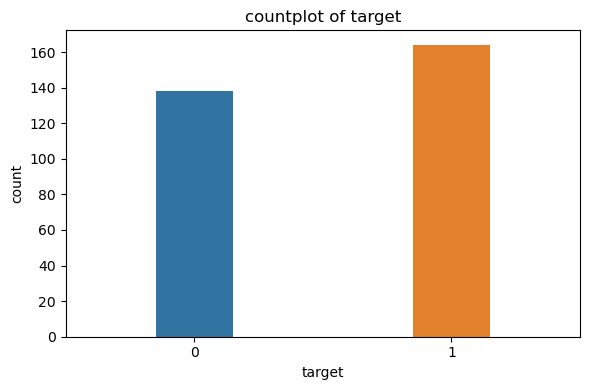

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x = "target", width=0.3)
plt.title("countplot of target")

plt.tight_layout()
plt.savefig("images/countplot_target.png",dpi=320)
plt.show()

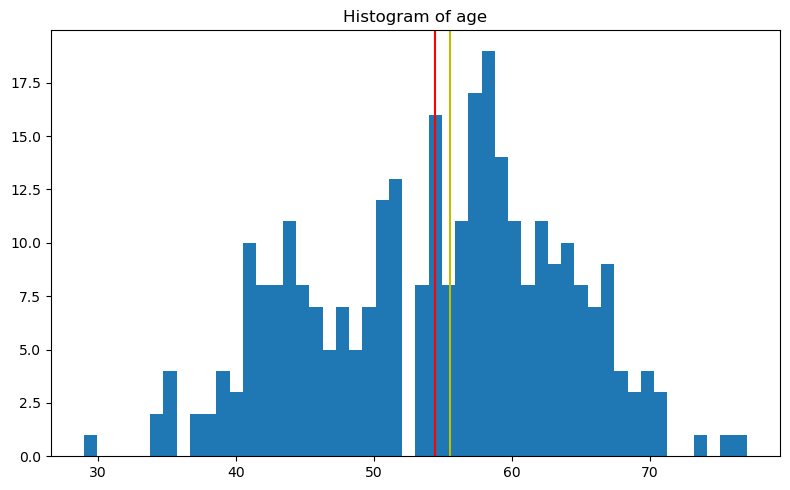

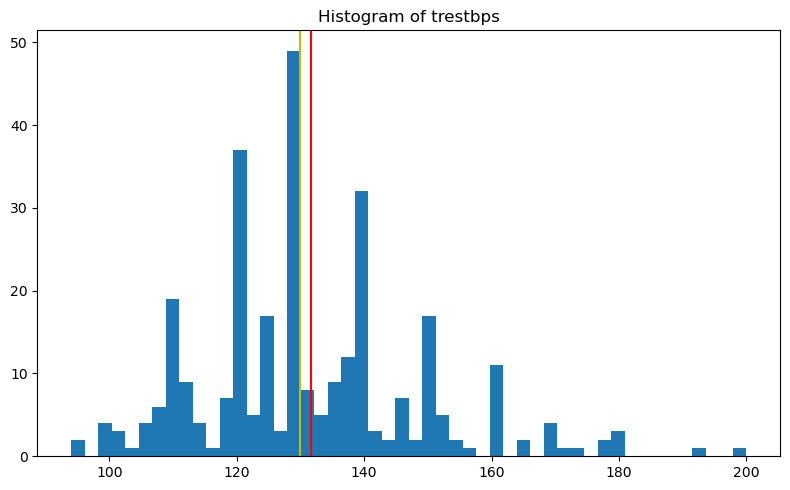

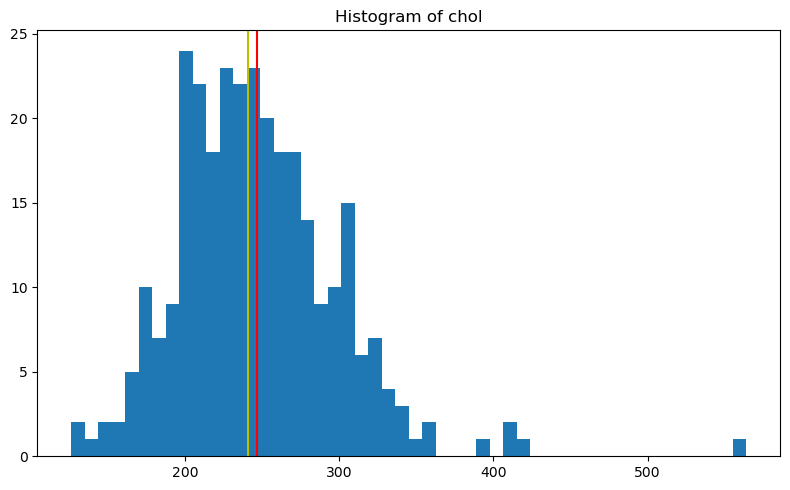

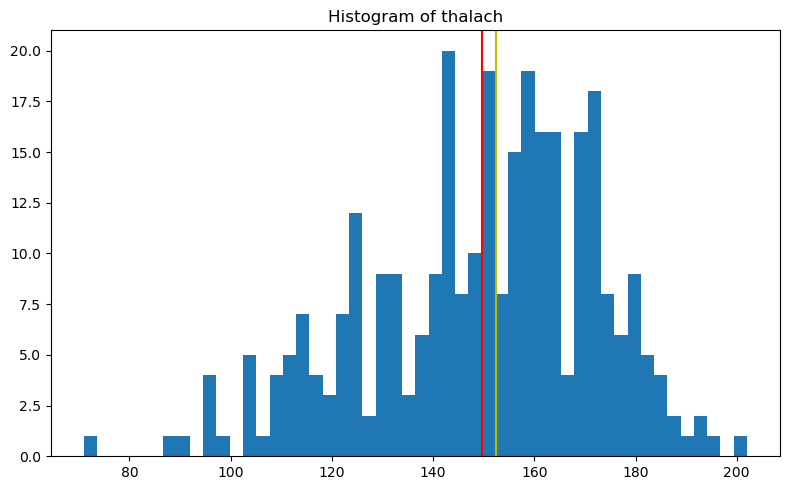

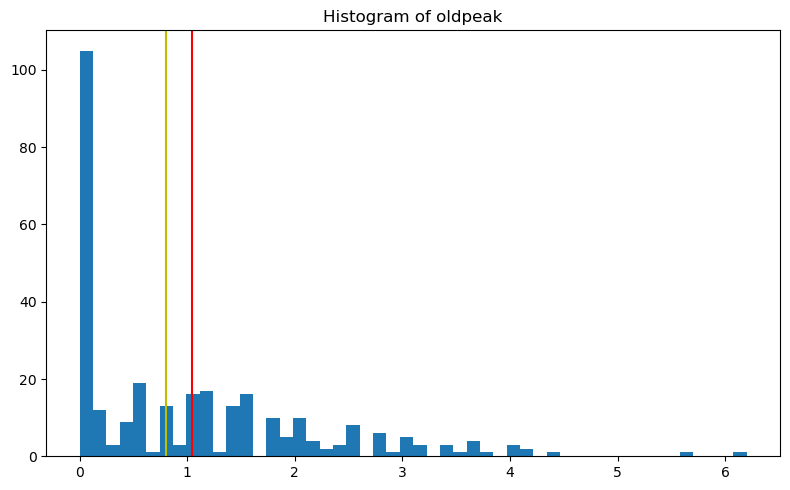

In [25]:
## now its to check the distribution of numerical variables

for col in num_columns:
    plt.figure(figsize=(8,5))
    plt.hist(df[col],bins=50)
    plt.title(f"Histogram of {col}")
    plt.axvline(df[col].mean(),color='r')
    plt.axvline(df[col].median(), color='y')
    plt.tight_layout()
    plt.savefig(f"images/histogram_{col}.png",dpi=300)
    plt.show()

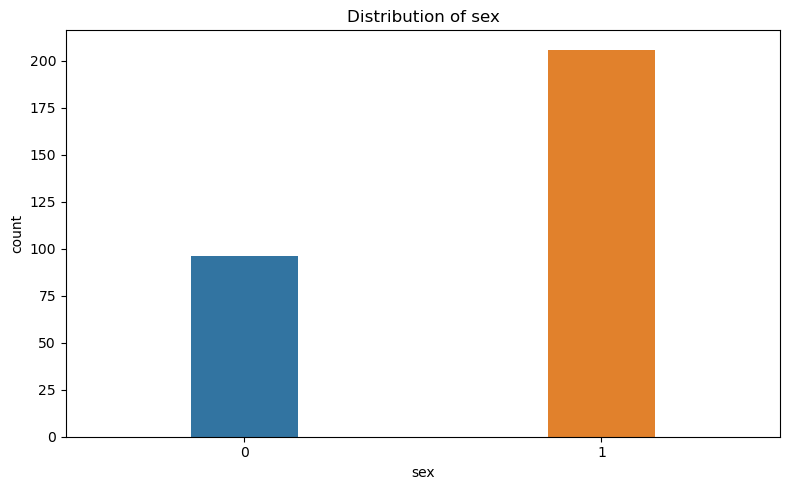

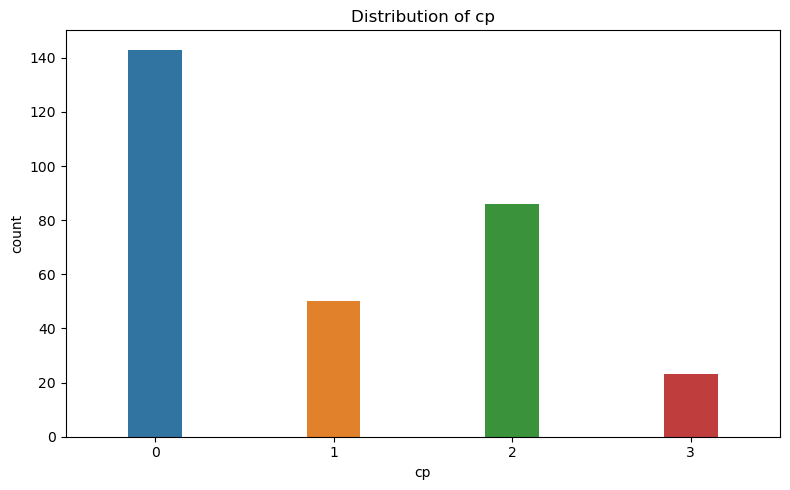

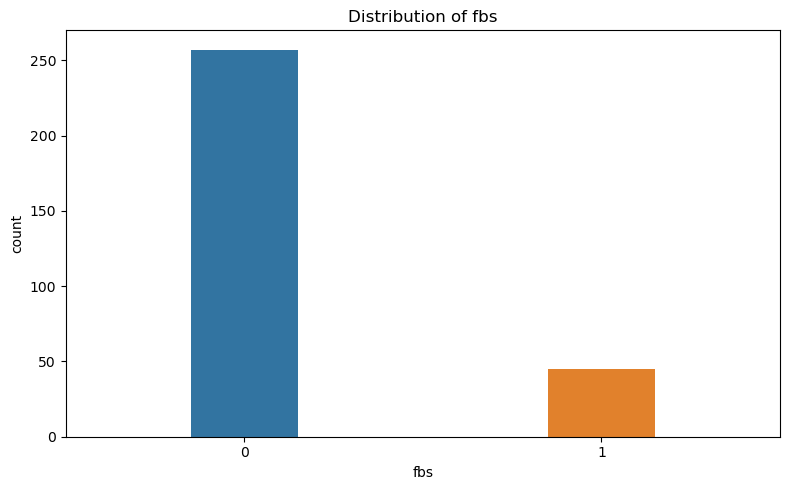

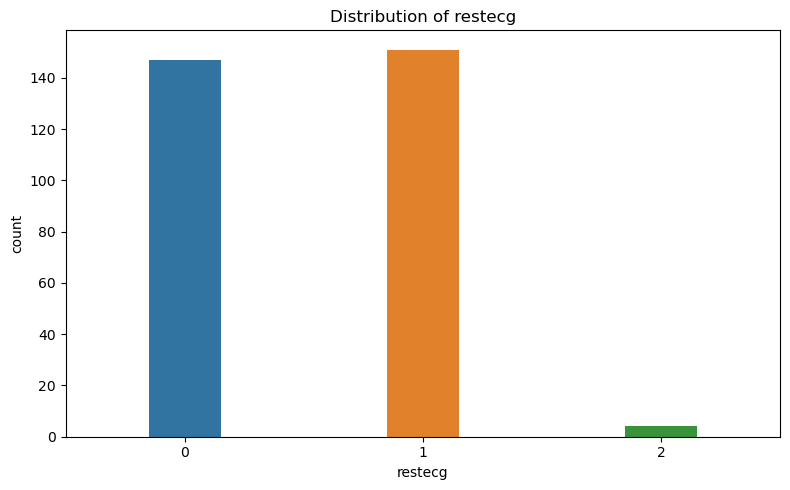

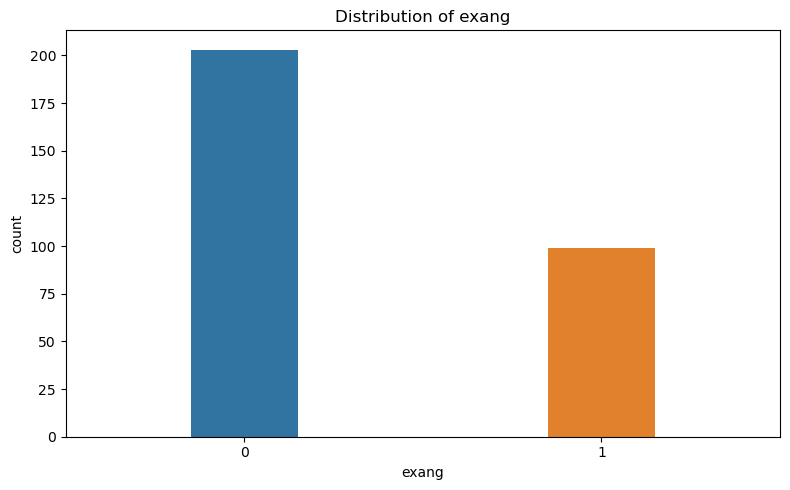

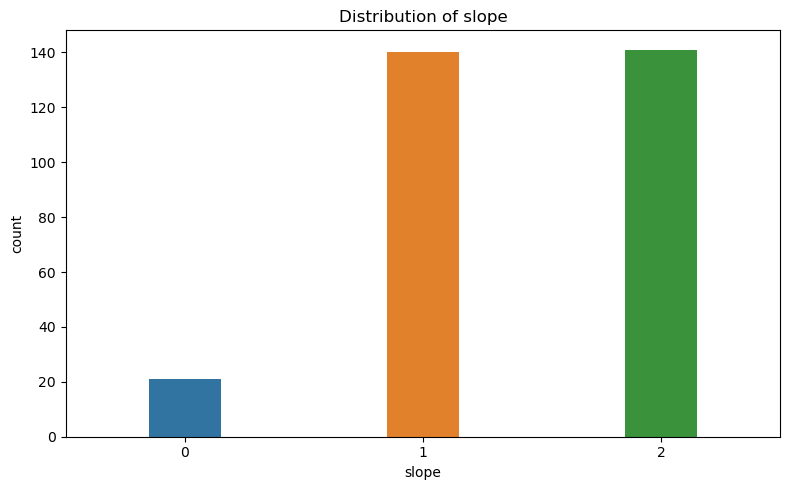

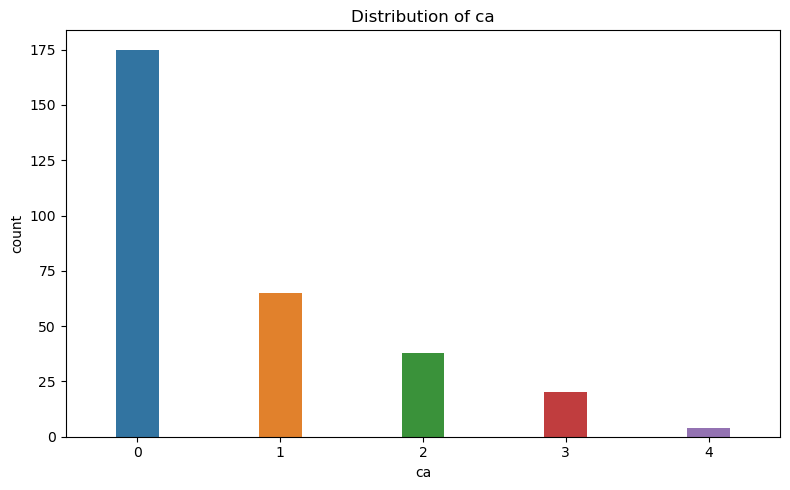

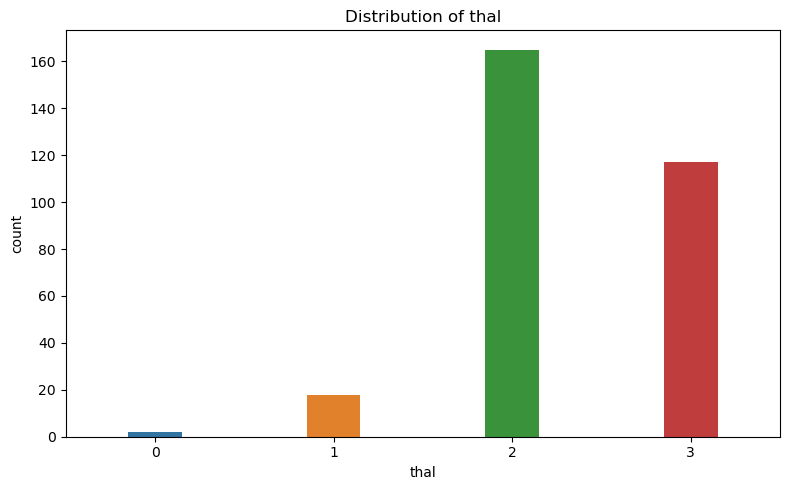

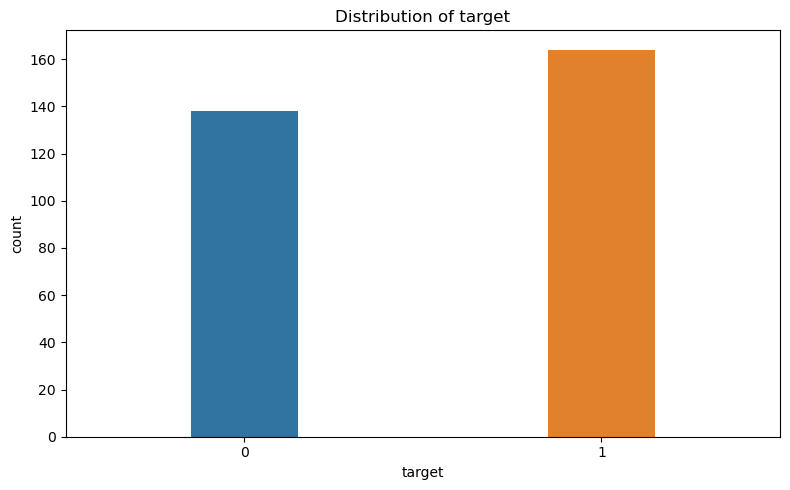

In [26]:
## now we will check the distribution of categorical variables

for col in cat_columns:
    plt.figure(figsize = (8,5))
    sns.countplot(data=df,x=col, width=0.3)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"images/distribution_{col}",dpi=300)
    plt.show()

#### bivariate analysis

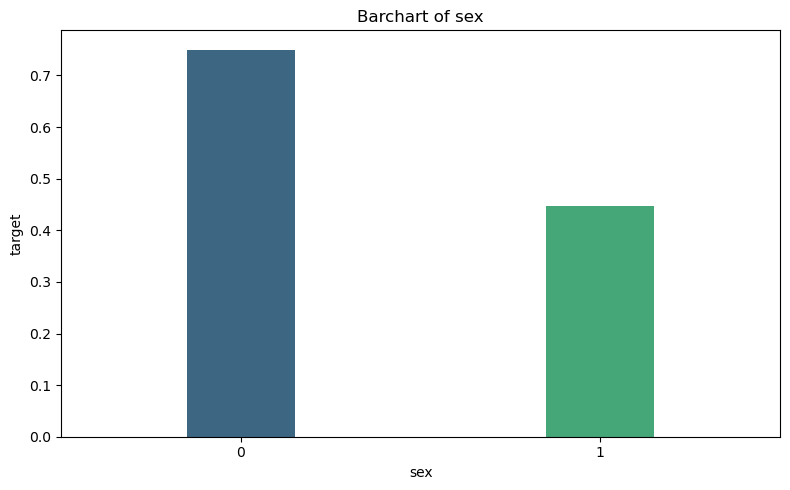

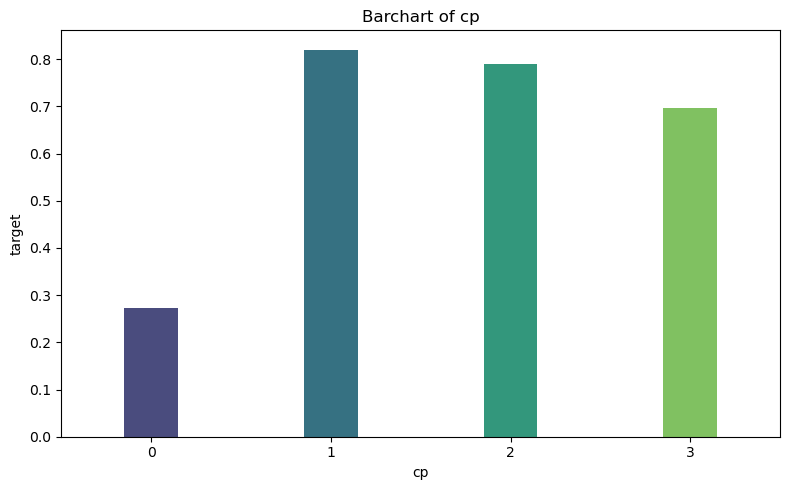

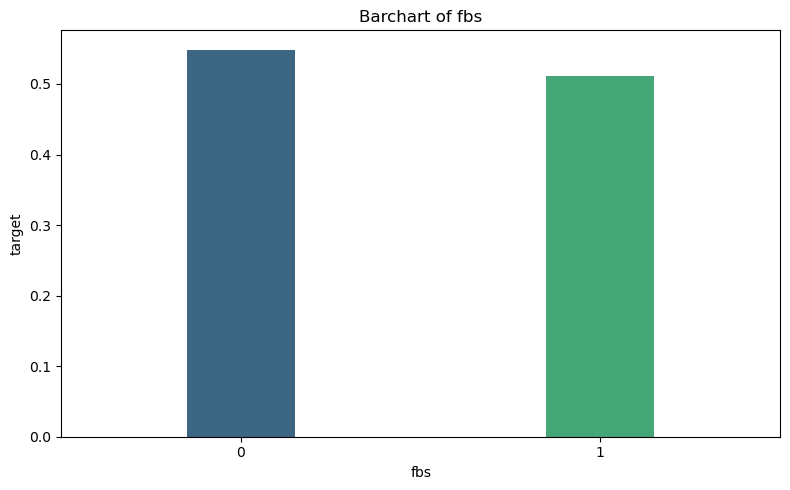

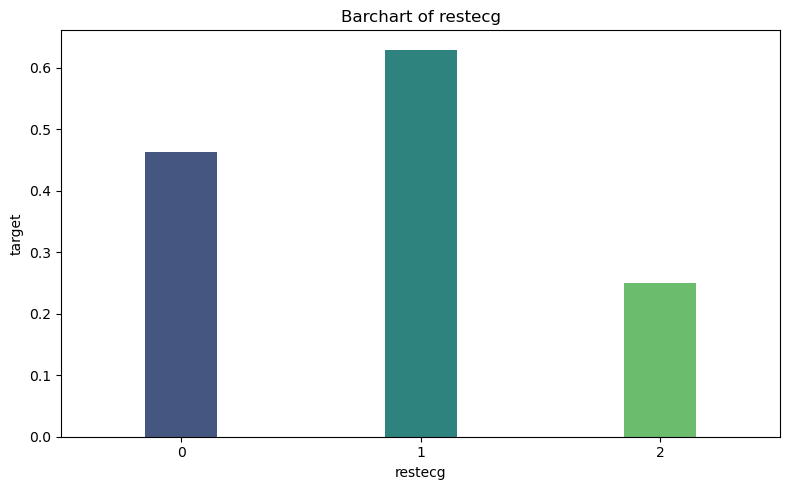

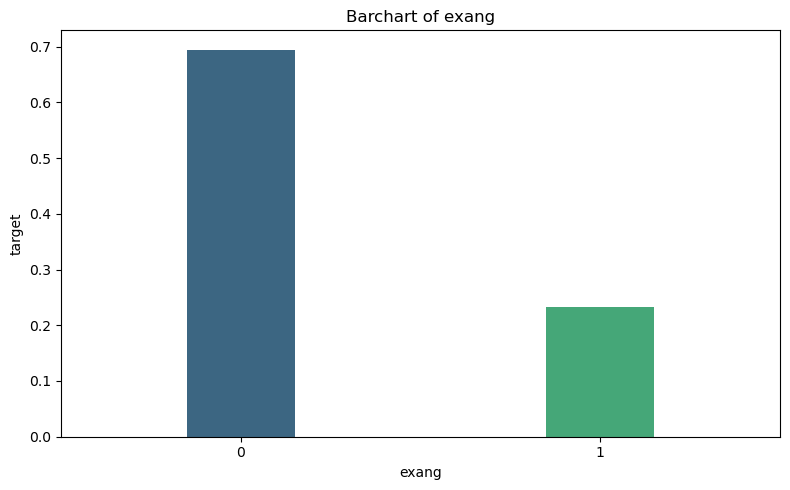

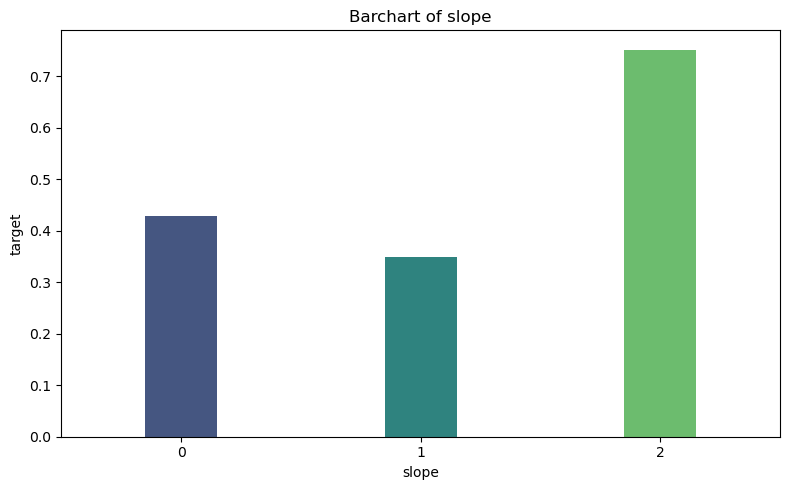

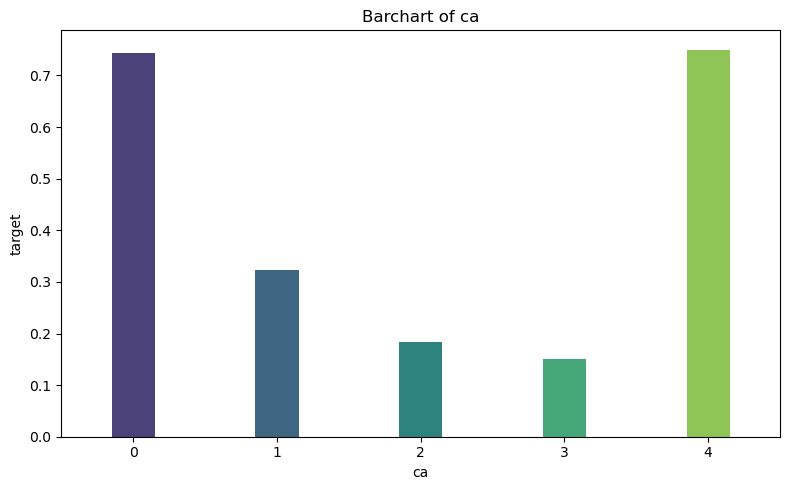

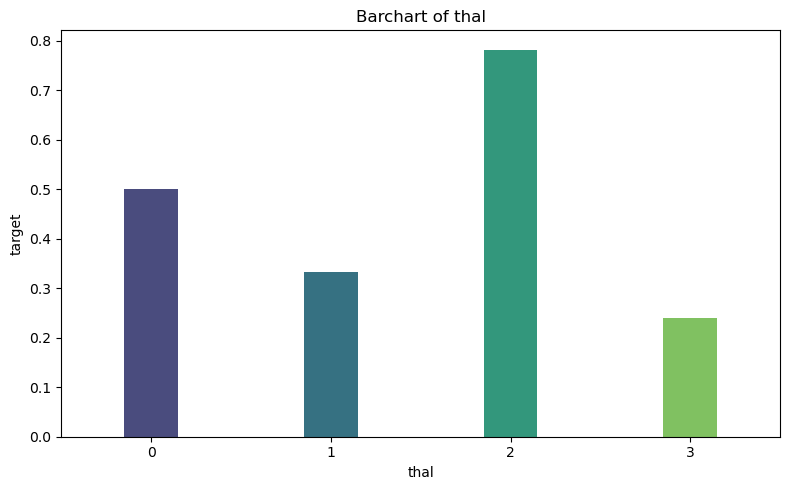

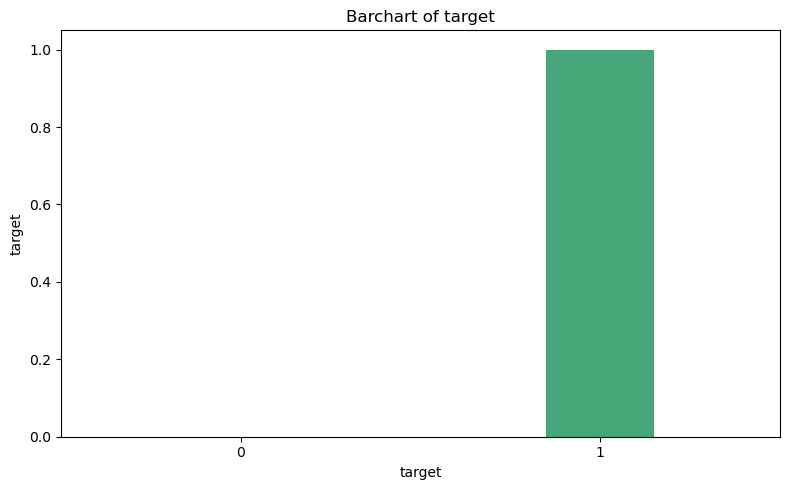

In [27]:
# bar plot between categorical variables and target variable


for col in cat_columns:
    plt.figure(figsize=(8,5))
    sns.barplot(data=df,x=col,y="target",errorbar=None,width=0.3,palette="viridis")
    plt.title(f"Barchart of {col}")
    plt.tight_layout()
    plt.savefig(f"images/barchart_{col}.png",dpi=300)
    plt.show()
    

In [28]:
## checking correlarion among numerical variables

print("correlation between numerical variables: ")
print(df[num_columns].corr())


correlation between numerical variables: 
               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.283121  0.207216 -0.395235  0.206040
trestbps  0.283121  1.000000  0.125256 -0.048023  0.194600
chol      0.207216  0.125256  1.000000 -0.005308  0.050086
thalach  -0.395235 -0.048023 -0.005308  1.000000 -0.342201
oldpeak   0.206040  0.194600  0.050086 -0.342201  1.000000


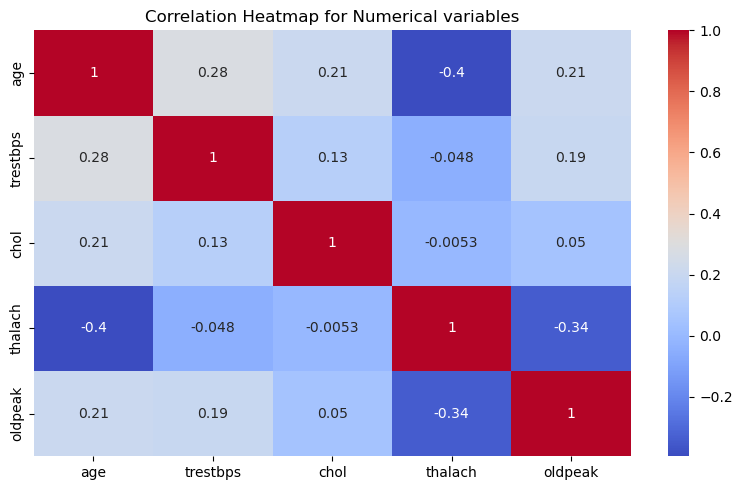

In [29]:
## correlation heatmap plot for better understanding

plt.figure(figsize=(8,5))
sns.heatmap(df[num_columns].corr(),cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap for Numerical variables")
plt.tight_layout()
plt.savefig('images/corr_heatmap_num.png',dpi=300)
plt.show()

### 4) Checking outliers and skewness

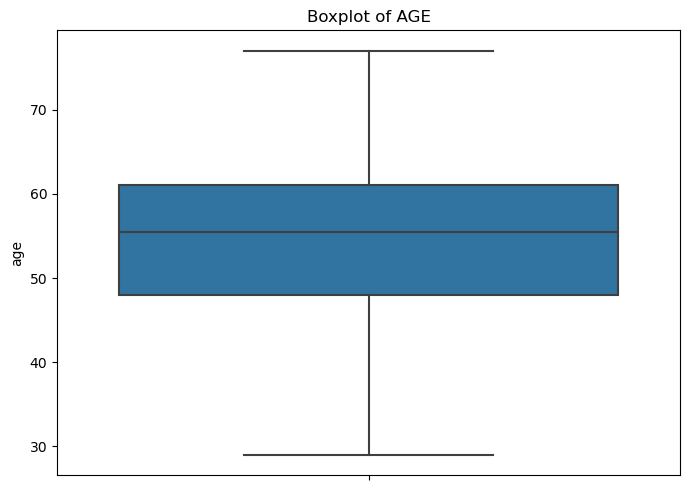

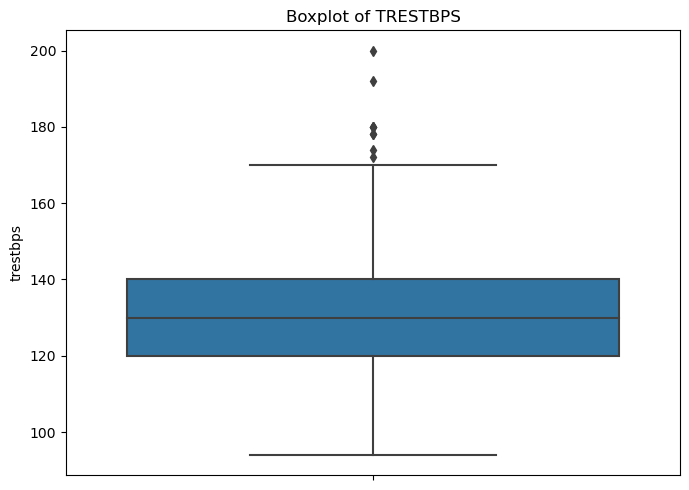

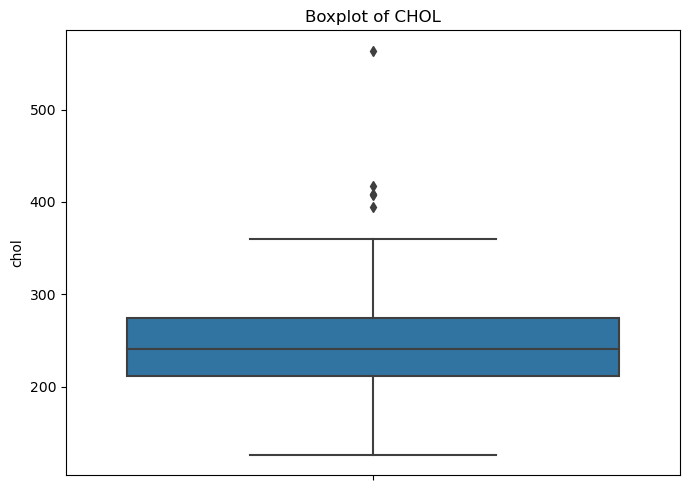

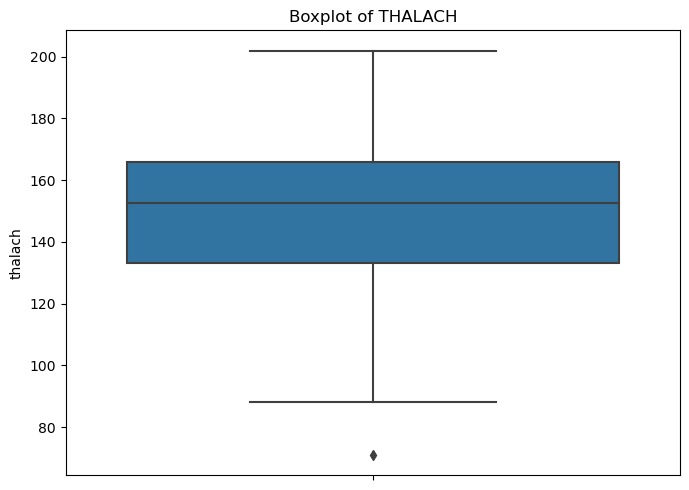

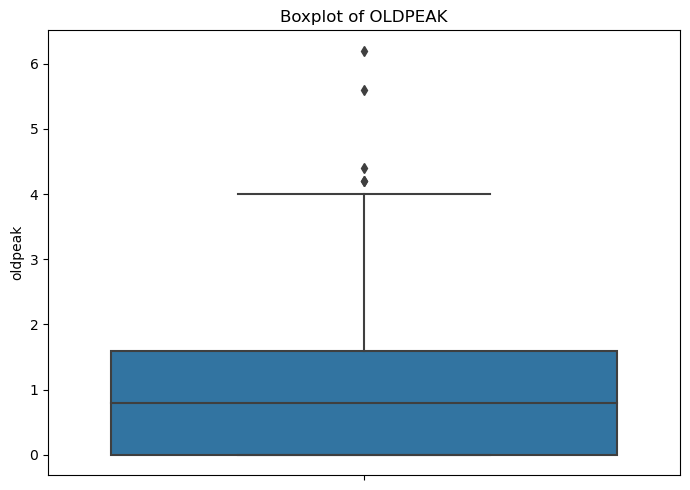

In [30]:
# boxplot for numerical variables
for col in num_columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,y=col)
    plt.title(f"Boxplot of {col.upper()}")
    plt.tight_layout()
    plt.savefig(f"images/boxplot_{col}",dpi=300)
    plt.show()

In [31]:
## skewness checking

for col in num_columns:
    skewness = stats.skew(df[col])
    print(f"Skewness of {col}: {skewness}")
    

Skewness of age: -0.2027299102135712
Skewness of trestbps: 0.7129775303337106
Skewness of chol: 1.1416258623729787
Skewness of thalach: -0.5300218699527917
Skewness of oldpeak: 1.2598750865993242


### 5) Supervised Machine learning Models: Training and Evaluation


In [33]:
# Core preprocessing & Model Utilitiles
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,
                            confusion_matrix,classification_report)



In [34]:
## sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [39]:
#advanced boosting models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [40]:
X = df.drop("target",axis=1)
y = df["target"]


In [41]:
X_train, X_test, y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [42]:
## splitting model based on scale

#scale
scale_models = {
    "Logistic Regression":LogisticRegression(random_state=42),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Support Vector Classifier":SVC(random_state=42)
}

## Tree based models

treemodels = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42, eval_metric="logloss"),
    "LightGBM":LGBMClassifier(random_state=42,verbose=-1),
    "CatBoost":CatBoostClassifier(verbose=0,random_state=42)
}



In [44]:
## columns transformer for scalemodels

preprocessor = ColumnTransformer(transformers=[
    ("num",StandardScaler(),num_columns)
],remainder = 'passthrough')

In [45]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak'])])

In [46]:
## training scale models

for name,model in scale_models.items():
    scale_pipeline = Pipeline(steps=[
        ("preprocessor",preprocessor),
        ("classifier",model)
    ])
    scale_pipeline.fit(X_train,y_train)
    y_pred = scale_pipeline.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f"Accuracy score of {name}: {acc:.4f}")
    result_scale =acc
    

Accuracy score of Logistic Regression: 0.8026
Accuracy score of K-Nearest Neighbors: 0.7895
Accuracy score of Support Vector Classifier: 0.8158


In [48]:
# training tree models 

for name, model in treemodels.items():
    tree_pipeline = Pipeline(steps=[
    ('classifier', model)
])
    tree_pipeline.fit(X_train, y_train)
    y_pred = tree_pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy score of {name}: {acc:.4f}")

Accuracy score of Decision Tree: 0.7237
Accuracy score of Random Forest: 0.8026
Accuracy score of Gradient Boosting: 0.7632
Accuracy score of XGBoost: 0.7500
Accuracy score of LightGBM: 0.7500
Accuracy score of CatBoost: 0.7763


In [53]:
# applying GridSearchCV on svc to find best parameters and estimator

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid=svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best SVC Parameters:",grid_svc.best_params_)
print('Best SVC Score:', grid_svc.best_score_)

Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVC Score: 0.8493719806763285


In [54]:
# applying GridSearchCV on Random Forest Model to find best parameters and estimator

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Classifier Parameters:",grid_rf.best_params_)
print('Best Random Forest Classifier Score:', grid_rf.best_score_)

Best Random Forest Classifier Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Classifier Score: 0.845024154589372


In [55]:
# best SVC model 
best_svc = grid_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_best_svc)
print(f"SVC Test Accuracy: {svc_test_acc:.4f}")
print("Confusion Matrix for SVC:\n",confusion_matrix(y_test, y_pred_best_svc))


# best RandomForest model
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_best_rf)
print(f"\nRandom Forest Test Accuracy: {rf_test_acc:.4f}")
print("Confusiton Matrix for RandomForest:\n",confusion_matrix(y_test, y_pred_best_rf))

SVC Test Accuracy: 0.8026
Confusion Matrix for SVC:
 [[26  9]
 [ 6 35]]

Random Forest Test Accuracy: 0.8026
Confusiton Matrix for RandomForest:
 [[27  8]
 [ 7 34]]


In [63]:
# choosing svc as the final model
final_model = SVC( C= 0.1, gamma = 'scale', kernel='linear', probability=True, random_state=42)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('svc', final_model)
])

final_pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [64]:
# saving final model 

import joblib
joblib.dump(final_pipeline, 'svc_final_pipeline.pkl')

# saving columns
columns = X.columns.tolist()
joblib.dump(columns, 'column_names.pkl')

['column_names.pkl']